In [45]:
import pandas as pd
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

The data was sourced from the Open Sourcing Mental Illness (OSMI), a non-profit corporation dedicated to raising awarenesss about mental health issues in the tech and open-source communities. This sample was sent out as a survey to those who attended tech conferences and online venues. This serves as a sort of selection bias as only those who attend the specific conferences or online events that the OSMI went to would get the survey. Also, this data is mostly self-reported data on a very subjective and polarizing issue of mental health. As so, the data has the potential for bias in that there is no direct measure whether one is diagnosed with a mental health illness and is up to the discretion of the participant. With that in mind, future surveys have the potential for a lot of growth. 

Compelling Questions:

1) What proportion of the sample has a mental illness and how does it compare to those who would bring up the topic with their employer?

2) Do workers report more physical or mental health issues? How do people evaluate physical issues vs mental health issues

In [3]:
df = pd.read_csv('survey.csv')
print(df.keys())
print(df.shape)

Index(['Timestamp', 'Age', 'Gender', 'Country', 'state', 'self_employed',
       'family_history', 'treatment', 'work_interfere', 'no_employees',
       'remote_work', 'tech_company', 'benefits', 'care_options',
       'wellness_program', 'seek_help', 'anonymity', 'leave',
       'mental_health_consequence', 'phys_health_consequence', 'coworkers',
       'supervisor', 'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence', 'comments'],
      dtype='object')
(1259, 27)


Let's explore the data set by looking at the demographic distributions. The three main variables we can look at are age, gender, and location by state. This can provide us with a snapshot of the distribution when the survey was collected. First, we clean the data of unresonable age inputs and focus the scope of this analysis on the US only. This way any differences in perception about mental health from international countries can be accounted for.

count    1.259000e+03
mean     7.942815e+07
std      2.818299e+09
min     -1.726000e+03
25%      2.700000e+01
50%      3.100000e+01
75%      3.600000e+01
max      1.000000e+11
Name: Age, dtype: float64
              Age
count  741.000000
mean    32.932524
std      7.740437
min      5.000000
25%     27.000000
50%     32.000000
75%     37.000000
max     72.000000


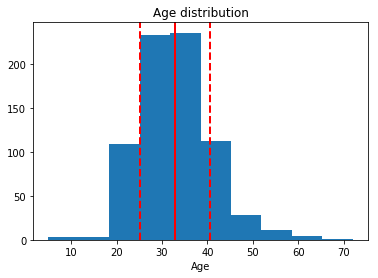

In [35]:
print(df.Age.describe())
# remove the age outliers that do not fit normal/expected values for age
outliers = df[(df['Age']<100) & (df['Age']>0)]
us = outliers.dropna(subset=['state'])
international = outliers[outliers.state.isnull()]

print(us.describe())
plt.hist(us.Age)
plt.title("Age distribution")
plt.axvline(us.Age.mean(), color='r', linestyle='solid', linewidth=2)
plt.axvline(us.Age.mean() + us.Age.std(), color='r', linestyle='dashed', linewidth=2)
plt.axvline(us.Age.mean() - us.Age.std(), color='r', linestyle='dashed', linewidth=2)
plt.xlabel('Age')
plt.show()

Looking at this, we see that the majority of the respondents are aged 18-46, showing that the sample has a normal spread and encompasses multiple age groups. 

Exploring the Gender Distribution

In [36]:
# Looking at the distribution, we get a sense for how the people are responding and we can already see that we need to clean
# Clean up the gender data so there's less redundancy. Use dicts to edit the dataframe values
replacements = {
                'Male': ['Cis Male', 'Cis Man','M','Mail','Make','Mal','Male','Male ', 'Male (CIS)', 'Malr','Man','cis male',
                         'm','maile','male','msle'],
                'Female': ['Cis Female','F','Femake','Female','Female ', 'Female (cis)','cis-female/femme','Woman','femail',
                           'f','woman','female'],
                'Other': ['A little about you','Agender','All','Androgyne','Enby','Female (trans)','Genderqueer','Guy (-ish) ^_^',
                          'Nah','Neuter','Trans woman','Trans-female', 'fluid','male leaning androgynous','non-binary',
                          'ostensibly male, unsure what that really means','p','queer','queer/she/they','something kinda male?',
                          'Male-ish']
}
#Iterate over the Series and replace them with the dict values
for k, v in replacements.items():
        us.loc[us.Gender.isin(v), 'Gender'] = k
        
#This gives us a nice distribution of the Age and Gender deistribution, which we can further visualize
print("Age Distribution by Gender:\n", us.groupby("Gender")['Age'].describe())

Age Distribution by Gender:
         count       mean        std   min   25%   50%    75%   max
Gender                                                            
Female  179.0  31.541899   7.104531  20.0  26.0  30.0  35.00  72.0
Male    552.0  33.481884   7.804068   5.0  28.0  33.0  38.00  65.0
Other    10.0  27.500000  10.469533   8.0  23.5  27.5  29.75  46.0


C:\Users\sohai\Anaconda3\lib\site-packages\pandas\core\indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


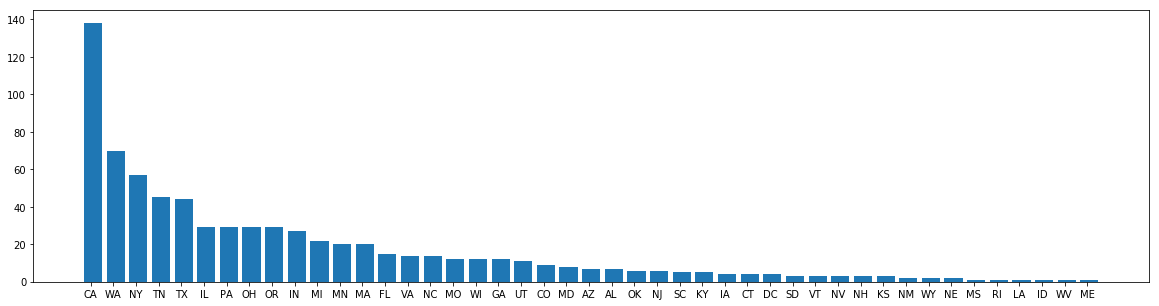

Number of participants outside the US: 513


In [68]:
counts = Counter(us['state'])
labels, values = zip(*counts.items())
desc_sort = np.argsort(values)[::-1]

labels = np.array(labels)[desc_sort]
values = np.array(values)[desc_sort]
indexes = np.arange(len(labels))
bar_width = 0.3


plt.figure(figsize=(20,5))
plt.bar(indexes, values, align='edge')
plt.xticks(indexes + bar_width, labels)
#plt.bar(us['state'], bins=45, rwidth=.5)
plt.ylim(0,145)
plt.show()
print("Number of participants outside the US:", sum(outliers['state'].isnull()))

With the data above, we see that the top 3 states that responded are based around the East and West coast. With the data summarised, we can start asking some questions about the perception of mental health issues. Firstly, what proportion of the sample has a mental illness and feel comfortable reporting about their issues. Secondly, are people more likely to report physical health issues over mental health issues? We can see this by analyzing the participants' response to whether or not they would bring up a mental health or physical health issue to an employer. 

In [72]:
mental = us.groupby('Gender')['mental_health_interview'].value_counts().unstack()
phys = us.groupby('Gender')['phys_health_interview'].value_counts().unstack()

Yes    637
No     622
Name: treatment, dtype: int64   1259


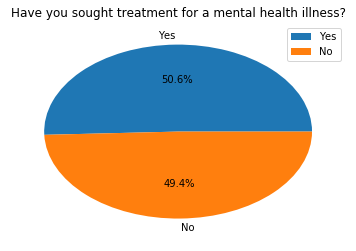

In [76]:
print(df['treatment'].value_counts(), " ", sum(df['treatment'].value_counts()))
# look into plotting treatment with mental_health_interview, creates a tuple value to see comparison
# use a bar plot, shared x-axis
count = df['treatment'].count()
plt.pie(df['treatment'].value_counts(), labels=['Yes', 'No'], autopct='%1.1f%%')
plt.title("Have you sought treatment for a mental health illness?")
plt.legend()
plt.show()

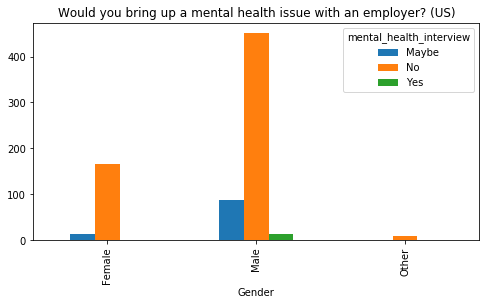

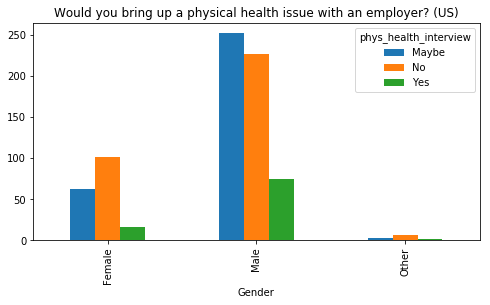

In [75]:
plt.figure()

mental.plot(kind='bar', title='Would you bring up a mental health issue with an employer? (US)', figsize=(8,4), layout=(1,3))
phys.plot(kind='bar', title='Would you bring up a physical health issue with an employer? (US)', figsize=(8,4), layout=(1,3))
plt.show()

From the above visualizations, we can see that employees felt more comfortable talking about physical issues as opposed to mental health issues to their employers. The overall trend is that employyees either don't want to or are on the fence about reporting their issues, regardless or whether it is mental or physical. This might be due to a belief that one might be negatively affected in both perception and career capital. This attitude can contribute to the idea that people should just work through stressful times, which can in turn increase one's risk for burnout. A possible indication is that people in the tech industry either are not fully aware of the need for mental care or are not educated fully to the resources that are available to them. Another insight from this is that most employers tend to not want to bring up issues in general with their employers, which can be induced by a fear that one might get laid off. If one does not seek assistance for a physical issue such as a fractured bone, the problem gets worse if it isn't treated in a timely manner. The same can also apply to mental health issues. If someone has a problem that is stressing them out, then rather than blowing it off and worrying about it later, one can take specific courses of actions to put themselves in a better position to handle their mental health issues. The point isn't to avoid all issues relating to mental health as stress is a common part of life. What needs to be done is people need to be educated on how to manage the stressful times in their life so they can be best prepared to handle them.

Based on the pie graph, half of the survey population has officially sought treatment for their mental health issues. This combined with the fact that around 2/3 of the participants either would not or might not disclose information about their mental health issues, we can see that there is a belief in workers to not involve thier employers when it comes to thier mental health. While this might have some merit in that not every single problem should be discussed in the office, employers can take a step forward and offer resources to their employees that can help to reduce or lower stress. For people with serious mental health issues other than stress and risk of burnout, employers can create an open environment in which people can feel secure in seeking out mental health treatment.

Conclusion


This survey was a great step in collecting mental health data in the tech industry, one of the most competitive industries in the world. In a culture where some companies seek out employees that can work under short deadlines and heavy work loads, it is imperative that we find ways for a good work-life balance. This survey could be further improved by measuring average work hours of a participant, a more general stress self-survey to gauge factors such as burnout vs actual mental disorders, and a measure for whether one has been diagnosed with a mental health condition before. Another possibly useful measure would be to see how many other employees one works with. This can allow researchers to see measure stress in small businesses to larger companies.